In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preperation

In [163]:
df = pd.read_csv("aqarmap_final.csv")
df.head()

,URL,Price,Address,Area,Rooms,Baths,Lat,Lon
0,https://aqarmap.com.eg/ar/listing/6586177-for-...,"5,000,000 جنيه",الاسكندرية / شارع أبو قير - طريق الحرية,140 متر²,1.0,2.0,31.245682,29.954224
1,https://aqarmap.com.eg/ar/listing/6588316-for-...,"3,640,000 جنيه",القاهرة الكبرى / الحي الأول,260 متر²,3.0,3.0,30.083355,31.552734
2,https://aqarmap.com.eg/ar/listing/6588088-for-...,"1,265,000 جنيه",القاهرة الكبرى / شارع الملك فيصل,150 متر²,3.0,3.0,30.016787,31.184692
3,https://aqarmap.com.eg/ar/listing/6588389-for-...,"12,400,000 جنيه",القاهرة الكبرى / كمبوند دي جويا 4 - تاج مصر,274 متر²,4.0,4.0,29.988245,31.761475
4,https://aqarmap.com.eg/ar/listing/6601044-for-...,"2,700,000 جنيه",القاهرة الكبرى / الحي الترفيهي,142 متر²,3.0,2.0,30.244832,31.442871


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   URL      8533 non-null   object 
 1   Price    8533 non-null   object 
 2   Address  8533 non-null   object 
 3   Area     8533 non-null   object 
 4   Rooms    7911 non-null   float64
 5   Baths    7218 non-null   float64
 6   Lat      8063 non-null   float64
 7   Lon      8063 non-null   float64
dtypes: float64(4), object(4)
memory usage: 533.4+ KB


In [165]:
df["Price"] = (
    df["Price"].str
    .replace("جنيه","").str
    .replace(",","")
    .astype(float)
    )
df["Area"] = (
df["Area"].str
.replace("متر²","")
.astype("float")
)

In [166]:
def Outliers(data,rows,cols):    

    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, col in enumerate(data):
        df[col].plot(kind="box", ax=axes[i])
        axes[i].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


In [167]:
numeric_data = df.select_dtypes("number")
numeric_data.describe()

,Price,Area,Rooms,Baths,Lat,Lon
count,8.533000e+03,8533.000000,7911.000000,7218.000000,8063.000000,8063.000000
mean,7.791131e+06,146.282433,2.443560,2.039623,29.464362,31.726493
std,6.088965e+06,69.364512,1.227609,0.974005,1.242847,1.275749
min,7.200000e+05,5.000000,1.000000,1.000000,25.834063,27.233149
25%,4.000000e+06,100.000000,2.000000,1.000000,29.921613,31.014404
50%,6.403407e+06,140.000000,3.000000,2.000000,30.016787,31.486816
75%,9.352750e+06,178.000000,3.000000,3.000000,30.064340,31.722848
max,9.500000e+07,720.000000,67.000000,22.000000,31.508313,34.439819


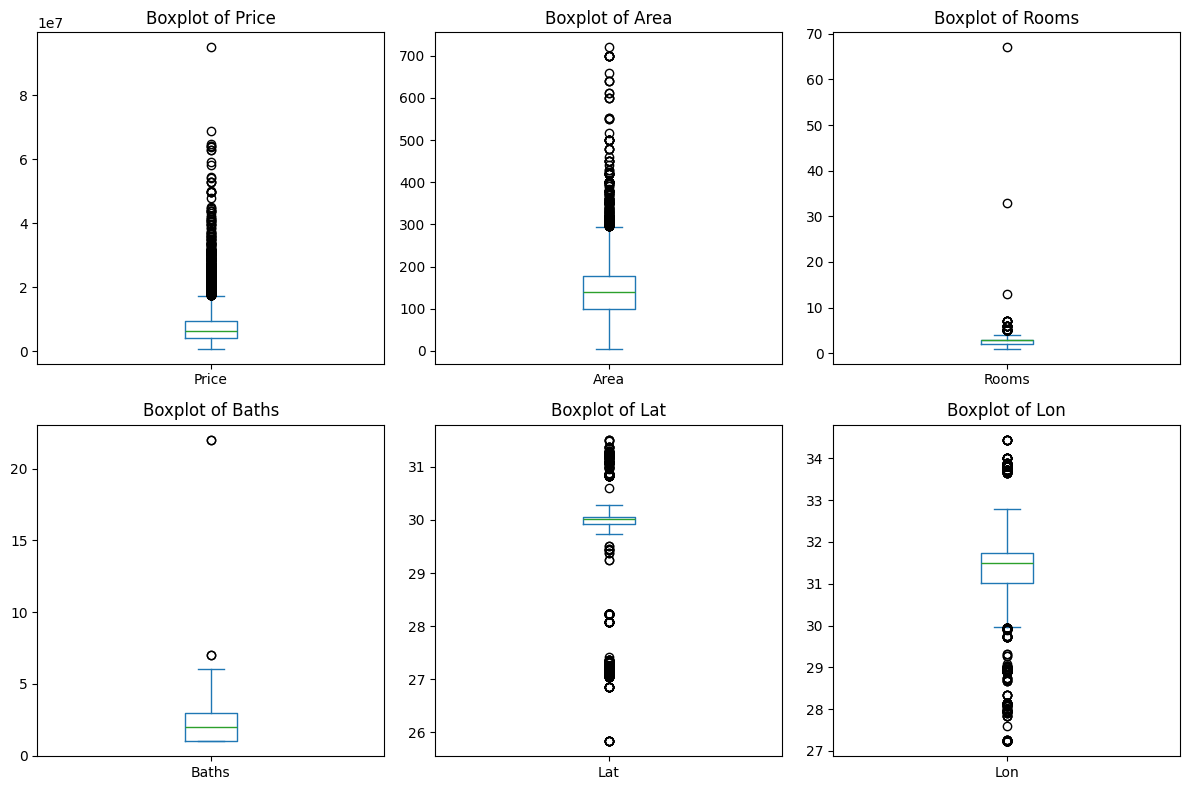

In [168]:
Outliers(numeric_data,2,3)

In [169]:
df.isna().sum()

URL           0
Price         0
Address       0
Area          0
Rooms       622
Baths      1315
Lat         470
Lon         470
dtype: int64

## Data Cleaning

In [170]:
def wrangle(file):
    # reading the csv file
    df = pd.read_csv(file)
    
    # converting Price and area columns to float
    df["Price"] = (
    df["Price"].str
    .replace("جنيه","").str
    .replace(",","")
    .astype(float)
    )
    df["Area"] = (
    df["Area"].str
    .replace("متر²","")
    .astype("float")
    )

    # splitting the address to Governate and Neighbourhood
    df["Governate"] = df["Address"].str.split("/",expand=True)[0]
    df["Neighbourhood"] = df["Address"].str.split("/",expand=True)[1].str.split("-",expand=True)[0]
    df.drop("Address",axis=1,inplace=True)

    # removing outliars
    df = df[df["Rooms"] < 10]
    df = df[df["Baths"] < 10]
    df = df[df["Area"] < 500]
    df = df[df["Price"] < 20_000_000]

    #removing nulls
    df.dropna(inplace=True)

    return df

In [171]:
df = wrangle("aqarmap_final.csv")
df.head()

,URL,Price,Area,Rooms,Baths,Lat,Lon,Governate,Neighbourhood
0,https://aqarmap.com.eg/ar/listing/6586177-for-...,5000000.0,140.0,1.0,2.0,31.245682,29.954224,الاسكندرية,شارع أبو قير
1,https://aqarmap.com.eg/ar/listing/6588316-for-...,3640000.0,260.0,3.0,3.0,30.083355,31.552734,القاهرة الكبرى,الحي الأول
2,https://aqarmap.com.eg/ar/listing/6588088-for-...,1265000.0,150.0,3.0,3.0,30.016787,31.184692,القاهرة الكبرى,شارع الملك فيصل
3,https://aqarmap.com.eg/ar/listing/6588389-for-...,12400000.0,274.0,4.0,4.0,29.988245,31.761475,القاهرة الكبرى,كمبوند دي جويا 4
4,https://aqarmap.com.eg/ar/listing/6601044-for-...,2700000.0,142.0,3.0,2.0,30.244832,31.442871,القاهرة الكبرى,الحي الترفيهي


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 8526
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   URL            7021 non-null   object 
 1   Price          7021 non-null   float64
 2   Area           7021 non-null   float64
 3   Rooms          7021 non-null   float64
 4   Baths          7021 non-null   float64
 5   Lat            7021 non-null   float64
 6   Lon            7021 non-null   float64
 7   Governate      7021 non-null   object 
 8   Neighbourhood  7021 non-null   object 
dtypes: float64(6), object(3)
memory usage: 548.5+ KB


In [173]:
numeric_data = df.select_dtypes("number")
numeric_data.describe()

,Price,Area,Rooms,Baths,Lat,Lon
count,7.021000e+03,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,6.542807e+06,140.062099,2.403361,2.005697,29.395825,31.846294
std,3.578887e+06,62.646775,0.911284,0.898223,1.282763,1.224548
min,7.200000e+05,5.000000,1.000000,1.000000,27.044449,27.268066
25%,3.701480e+06,94.000000,2.000000,1.000000,29.854937,31.019897
50%,5.844000e+06,138.000000,3.000000,2.000000,30.007274,31.497803
75%,8.500000e+06,173.000000,3.000000,3.000000,30.064340,31.876831
max,1.950000e+07,480.000000,7.000000,7.000000,31.508313,33.881836


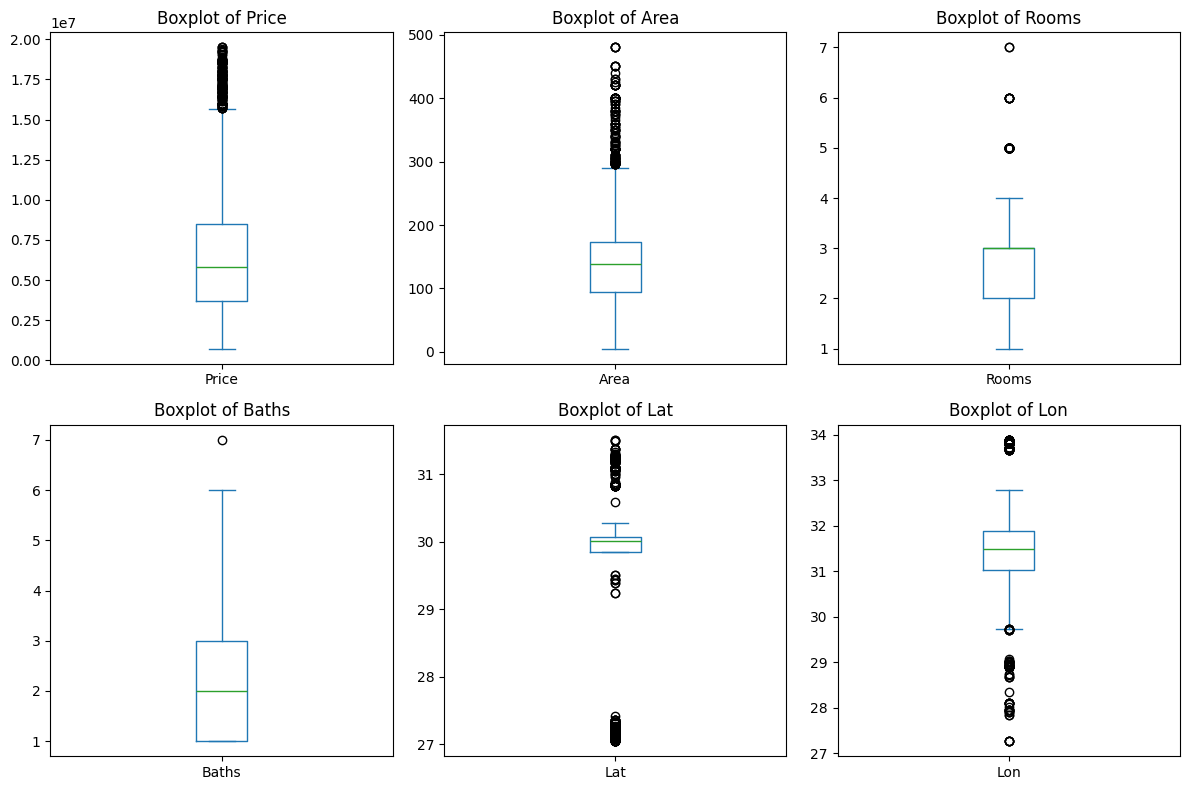

In [174]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(numeric_data[:6]):
    df[col].plot(kind="box", ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [175]:
df["Area"].value_counts().sort_index().tail(10)


Area
385.0     1
390.0     2
395.0     4
400.0    23
420.0     7
425.0     1
430.0     2
440.0     1
450.0     4
480.0     4
Name: count, dtype: int64

In [176]:
df["Price"].value_counts().sort_index().tail(10)

Price
18773000.0    1
18838000.0    1
19000000.0    1
19065000.0    1
19200000.0    3
19305000.0    1
19305903.0    1
19366000.0    1
19390000.0    1
19500000.0    3
Name: count, dtype: int64

In [177]:
df.isna().sum()

URL              0
Price            0
Area             0
Rooms            0
Baths            0
Lat              0
Lon              0
Governate        0
Neighbourhood    0
dtype: int64

## Data Exploration

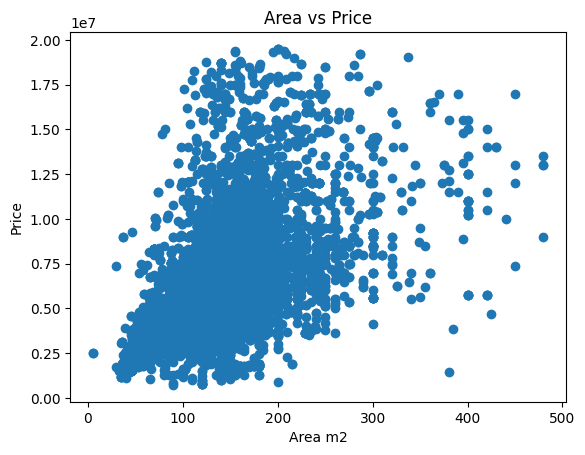

In [179]:
plt.scatter(data=df,x="Area",y="Price")
plt.xlabel("Area m2")
plt.ylabel("Price")
plt.title("Area vs Price");

<Axes: >

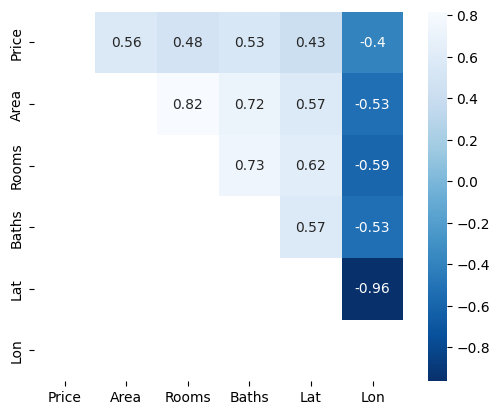

In [194]:
corr = numeric_data.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Blues_r", annot=True, square=True)